In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('Data.xlsx') 
df.head()

,ID_puppy,ID_litter,sex,group,breed_size,Breed,Litter_size,Dead,Age_dead,Diarr_1m,...,giar_D35_41,cocc_D35_41,giar_D42_48,cocc_D42_48,giar_D49_56,cocc_D49_56,toxo_c_D35_41,toxo_c_D42_48,toxo_l_D35_41,toxo_l_D42_48
0,10A,10L,M,EL,S,Poodle,1,1,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11A,11L,M,OO,S,Lhasa Apso,6,0,NaN,1,...,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,NaN,NaN
2,11B,11L,F,OL,S,Lhasa Apso,6,0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11C,11L,F,OO,S,Lhasa Apso,6,1,2.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11D,11L,F,OL,S,Lhasa Apso,6,1,5.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(df.columns[[0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12]],inplace=True,axis=1)
df = df.drop(["ID_litter","Age_dead"], axis=1)

In [4]:
df.head()

,sex,group,breed_size,Breed,Litter_size,Dead,Diarr_1m,Diarr_2m,dam_sep,weight_D0,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
0,M,EL,S,Poodle,1,1,0,0,NaN,232.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M,OO,S,Lhasa Apso,6,0,1,0,9.0,NaN,...,1280.0,80.0,31.1,0.0,0.0,NaN,1.240000e+09,NaN,NaN,10.0
2,F,OL,S,Lhasa Apso,6,0,1,0,9.0,NaN,...,1280.0,45.4,111.0,26000.0,0.0,NaN,1.990000e+04,NaN,NaN,10.0
3,F,OO,S,Lhasa Apso,6,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F,OL,S,Lhasa Apso,6,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On rend catégoriques les variables qui sont de type object comme l'ID de la portée, le sexe, le groupe, la taille de la race et la taille de la portée.

In [5]:
df['sex']=pd.Categorical(df['sex'],ordered=False)
df['group']=pd.Categorical(df['group'],ordered=False)
df['breed_size']=pd.Categorical(df['breed_size'],ordered=False)
df['Breed']=pd.Categorical(df['Breed'],ordered=False)

In [6]:
df.dtypes

sex                 category
group               category
breed_size          category
Breed               category
Litter_size            int64
Dead                   int64
Diarr_1m               int64
Diarr_2m               int64
dam_sep              float64
weight_D0            float64
weight_D1              int64
weight_D2            float64
weight_D3            float64
weight_D4            float64
weight_D7            float64
weight_D14           float64
weight_D21           float64
weight_D28           float64
weight_D35           float64
weight_D42           float64
weight_D49           float64
weight_D56           float64
IgG_dam              float64
age_dam                int64
IgG_milk_mean        float64
IgG_puppy_D2         float64
IgG_puppy_D21        float64
IgG_puppy_D28        float64
Abs_CPV2_D2          float64
Abs_CPV2_D7          float64
Abs_CPV2_D14         float64
Abs_CPV2_D21         float64
Abs_CPV2_D28         float64
Abs_CPV2_D35         float64
Abs_CPV2_D42  

In [7]:
first_column = df.pop('Dead') 
df.insert(0, 'Dead', first_column) 
df.head()

,Dead,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,dam_sep,weight_D0,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
0,1,M,EL,S,Poodle,1,0,0,NaN,232.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,M,OO,S,Lhasa Apso,6,1,0,9.0,NaN,...,1280.0,80.0,31.1,0.0,0.0,NaN,1.240000e+09,NaN,NaN,10.0
2,0,F,OL,S,Lhasa Apso,6,1,0,9.0,NaN,...,1280.0,45.4,111.0,26000.0,0.0,NaN,1.990000e+04,NaN,NaN,10.0
3,1,F,OO,S,Lhasa Apso,6,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,F,OL,S,Lhasa Apso,6,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Données catégorielles avec le LabelEncoder

On transforme les données catégorielles en données numériques avec un LabelEncoder.

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()

df1=df.copy()
df1.drop('Dead', axis=1,inplace=True)
df1['group']= label_encoder.fit_transform(df['group'])
df1['Breed']= label_encoder.fit_transform(df['Breed'])
df1['breed_size']= label_encoder.fit_transform(df['breed_size'])

df1['sex'] = df['sex'].replace(to_replace={'M':1,'F':0})

### Imputation par l'IterativeImputer

In [9]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [10]:
imp_mean = IterativeImputer(imputation_order="descending")
imputed = pd.DataFrame(imp_mean.fit_transform(df1), columns=df1.columns)
imputed.describe()

,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,dam_sep,weight_D0,weight_D1,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.000000,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,169.000000,169.000000,169.000000
mean,0.514793,1.538462,0.715976,5.775148,5.905325,0.207101,0.142012,7.732840,254.539530,254.508876,...,1148.850896,7.425606e+04,3.046625e+05,5.463829e+06,8.780284e+07,2.518442e+08,1.691199e+08,3.018778,2.315509,9.889563
std,0.501266,1.118034,0.452288,3.399453,2.079499,0.406432,0.350100,1.214797,104.807179,117.442444,...,326.556083,7.262193e+05,3.105123e+06,4.878648e+07,6.140502e+08,9.024114e+08,6.520868e+08,57.118301,46.646851,7.160463
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,103.565418,83.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-733.797017,-552.042567,3.000000
25%,0.000000,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000,7.000000,179.000000,173.000000,...,1148.852028,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.620000e+02,3.580000e+03,5.000000,4.000000,9.000000
50%,1.000000,2.000000,1.000000,6.000000,6.000000,0.000000,0.000000,7.921909,222.733232,218.000000,...,1280.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.210000e+03,6.380000e+05,4.000000e+06,8.744351,8.000000,9.874174
75%,1.000000,3.000000,1.000000,9.000000,7.000000,0.000000,0.000000,9.000000,315.140510,315.000000,...,1280.000000,1.330000e+04,2.540000e+03,7.290000e+05,8.780284e+07,2.518442e+08,1.691199e+08,9.208761,9.000000,10.000000
max,1.000000,3.000000,1.000000,11.000000,10.000000,1.000000,1.000000,9.080172,544.000000,585.000000,...,1327.014473,9.450000e+06,4.040000e+07,6.310000e+08,7.830000e+09,8.420000e+09,7.310000e+09,13.000000,12.000000,100.331700


In [11]:
df1.describe()

,sex,group,breed_size,Breed,Litter_size,Diarr_1m,Diarr_2m,dam_sep,weight_D0,weight_D1,...,Abs_CPV2_D56,PCR_CPV2_D17,PCR_CPV2_D24,PCR_CPV2_D31,PCR_CPV2_D38,PCR_CPV2_D45,PCR_CPV2_D52,fec_score_D35_41,fec_score_D42_48,fec_score_D49_56
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,125.000000,96.000000,169.000000,...,125.000000,1.280000e+02,1.330000e+02,1.300000e+02,1.240000e+02,1.220000e+02,1.200000e+02,77.000000,96.000000,115.000000
mean,0.514793,1.538462,0.715976,5.775148,5.905325,0.207101,0.142012,7.688000,269.770833,254.508876,...,1147.520000,7.398402e+04,3.046625e+05,5.463395e+06,8.780115e+07,2.518424e+08,1.691277e+08,8.766234,8.406250,9.182609
std,0.501266,1.118034,0.452288,3.399453,2.079499,0.406432,0.350100,1.393626,121.132331,117.442444,...,379.759381,8.352569e+05,3.503051e+06,5.567488e+07,7.176389e+08,1.063326e+09,7.747946e+08,1.925563,2.292221,1.804393
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,109.000000,83.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,2.000000,3.000000
25%,0.000000,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000,7.000000,168.750000,173.000000,...,1280.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.395000e+02,1.182500e+03,8.000000,7.000000,8.000000
50%,1.000000,2.000000,1.000000,6.000000,6.000000,0.000000,0.000000,8.000000,233.500000,218.000000,...,1280.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.033500e+02,8.075000e+03,1.460000e+04,9.000000,9.000000,9.000000
75%,1.000000,3.000000,1.000000,9.000000,7.000000,0.000000,0.000000,9.000000,365.500000,315.000000,...,1280.000000,0.000000e+00,1.710000e+01,3.590000e+01,3.740000e+03,6.295000e+06,8.760000e+06,10.000000,10.000000,11.000000
max,1.000000,3.000000,1.000000,11.000000,10.000000,1.000000,1.000000,9.000000,544.000000,585.000000,...,1280.000000,9.450000e+06,4.040000e+07,6.310000e+08,7.830000e+09,8.420000e+09,7.310000e+09,13.000000,12.000000,12.000000


## ACP

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=imputed

n = X.shape[0]
p = X.shape[1]
sc = StandardScaler()
Z = sc.fit_transform(X)
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print('Valeurs propres : \n', eigval)
# proportion de variance expliquée
print('Proportion de variance : \n', acp.explained_variance_ratio_)

Valeurs propres : 
 [1.38991338e+01 4.36413800e+00 3.76299894e+00 2.47291385e+00
 2.00912543e+00 1.93403933e+00 1.77726456e+00 1.55974111e+00
 1.25711499e+00 1.23744935e+00 1.09643827e+00 1.05082653e+00
 1.00272439e+00 9.53528802e-01 8.62912655e-01 7.01499148e-01
 6.34574415e-01 5.70972943e-01 4.77721186e-01 4.48311347e-01
 4.05885301e-01 3.91111131e-01 3.61677129e-01 3.16612863e-01
 2.95357700e-01 2.63099538e-01 1.73454520e-01 1.52970840e-01
 1.29659156e-01 1.10355340e-01 8.96449065e-02 7.09978278e-02
 4.03336112e-02 3.34002017e-02 2.39260240e-02 1.75023555e-02
 1.49408224e-02 1.20391020e-02 8.16155193e-03 6.05828720e-03
 3.31963278e-03 3.05196357e-03 2.19996400e-03 6.63832588e-04
 1.47315134e-04]
Proportion de variance : 
 [3.08869641e-01 9.69808445e-02 8.36221986e-02 5.49536411e-02
 4.46472317e-02 4.29786518e-02 3.94947680e-02 3.46609136e-02
 2.79358887e-02 2.74988745e-02 2.43652949e-02 2.33517007e-02
 2.22827641e-02 2.11895289e-02 1.91758368e-02 1.55888700e-02
 1.41016537e-02 1.268

In [15]:
print(acp.explained_variance_[:10])

eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(15)], 
        "Variance expliquée" : acp.explained_variance_[:15],
        "% variance expliquée" : np.round(acp.explained_variance_ratio_[:15] * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_[:15]) * 100)
    }
)
eig

[13.98186677  4.39011501  3.78539774  2.48763357  2.02108451  1.94555147
  1.78784351  1.56902529  1.26459782  1.24481512]


,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,13.981867,31.0,31.0
1,Dim2,4.390115,10.0,41.0
2,Dim3,3.785398,8.0,49.0
3,Dim4,2.487634,5.0,54.0
4,Dim5,2.021085,4.0,59.0
5,Dim6,1.945551,4.0,63.0
6,Dim7,1.787844,4.0,67.0
7,Dim8,1.569025,3.0,71.0
8,Dim9,1.264598,3.0,73.0
9,Dim10,1.244815,3.0,76.0


In [16]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(len(X.columns))], 
        "Variance expliquée" : acp.explained_variance_,
        "% variance expliquée" : np.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,13.981867,31.0,31.0
1,Dim2,4.390115,10.0,41.0
2,Dim3,3.785398,8.0,49.0
3,Dim4,2.487634,5.0,54.0
4,Dim5,2.021085,4.0,59.0
5,Dim6,1.945551,4.0,63.0
6,Dim7,1.787844,4.0,67.0
7,Dim8,1.569025,3.0,71.0
8,Dim9,1.264598,3.0,73.0
9,Dim10,1.244815,3.0,76.0


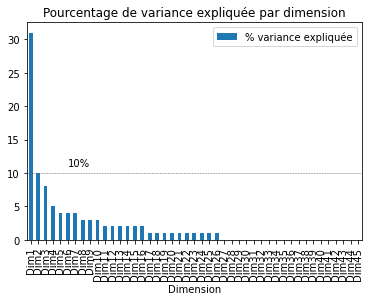

In [17]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 11, "10%") # ajout de texte
plt.axhline(y = 10, linewidth = .5, color = "dimgray", linestyle = "--") 
plt.title("Pourcentage de variance expliquée par dimension")
plt.show()

In [18]:
# Transformation en DataFrame pandas
pca_df = pd.DataFrame({
    "Dim1" : coord[:,0], 
    "Dim2" : coord[:,1],
    "Dim3" : coord[:,2],
    "Dim4" : coord[:,3],
    "Dim5" : coord[:,4],
    "Dim6" : coord[:,5],
    "Dim7" : coord[:,6],
    "Dim8" : coord[:,7],
    "Dim9" : coord[:,8],
    "Dim10" : coord[:,9],
    "Dim11" : coord[:,10],
    "Dim12" : coord[:,11],
    "Dim13" : coord[:,12],
    "Dim14" : coord[:,13],
    "Dim15" : coord[:,14]
})

# Résultat (premières lignes)
pca_df.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12,Dim13,Dim14,Dim15
0,-0.286228,0.035821,0.190099,0.517176,0.757417,-1.924247,0.629467,0.042966,0.656804,-0.314104,-1.042671,0.429840,0.125857,0.447644,0.737116
1,-3.586491,-0.500843,-1.125671,-0.545197,-1.509604,-0.170894,-1.788045,-0.753001,0.492653,0.004280,0.583612,-0.953085,1.316872,0.130137,-0.301202
2,-4.085484,-1.121092,-0.414627,-0.222432,-1.688163,-0.001988,-1.422006,0.330650,-1.069775,0.727577,0.935357,-0.600510,-0.165288,0.126658,0.389394
3,-0.646935,0.005438,-0.219808,-0.167937,-0.151459,-0.011573,-0.225645,0.284953,-0.241940,0.540747,0.447246,0.429124,-0.385102,-0.480635,-0.404035
4,-1.655119,-0.329246,0.920867,0.281402,-0.433799,-0.120806,-0.260559,0.659890,-0.444362,-0.020335,0.583738,0.170518,-0.257836,-0.366742,-0.200022


### Scree plot

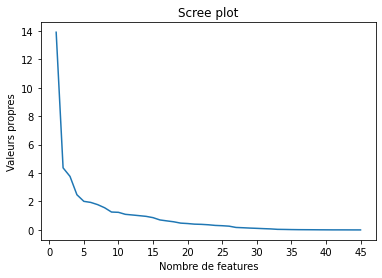

In [19]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de features")
plt.locator_params(axis="x", nbins=10)
plt.show()

### Cumul de variance selon le nombre de features

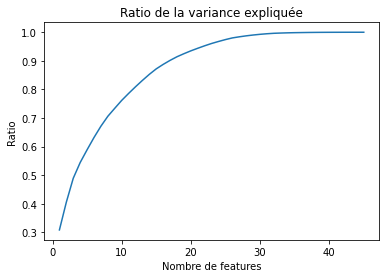

In [20]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Ratio de la variance expliquée")
plt.ylabel("Ratio")
plt.xlabel("Nombre de features")
plt.show()

### Test des bâtons brisés

In [21]:
# seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0    13.899134  4.394948
1     4.364138  3.394948
2     3.762999  2.894948
3     2.472914  2.561615
4     2.009125  2.311615
5     1.934039  2.111615
6     1.777265  1.944948
7     1.559741  1.802091
8     1.257115  1.677091
9     1.237449  1.565980
10    1.096438  1.465980
11    1.050827  1.375071
12    1.002724  1.291737
13    0.953529  1.214814
14    0.862913  1.143386
15    0.701499  1.076719
16    0.634574  1.014219
17    0.570973  0.955396
18    0.477721  0.899840
19    0.448311  0.847208
20    0.405885  0.797208
21    0.391111  0.749589
22    0.361677  0.704135
23    0.316613  0.660657
24    0.295358  0.618990
25    0.263100  0.578990
26    0.173455  0.540528
27    0.152971  0.503491
28    0.129659  0.467777
29    0.110355  0.433294
30    0.089645  0.399961
31    0.070998  0.367703
32    0.040334  0.336453
33    0.033400  0.306150
34    0.023926  0.276738
35    0.017502  0.248167
36    0.014941  0.220389
37    0.012039  0.193362
38    0.008162  0.167046


### Représentation des chiots par leurs coordonnées factorielles

10.06676415953963
20.905253416565536


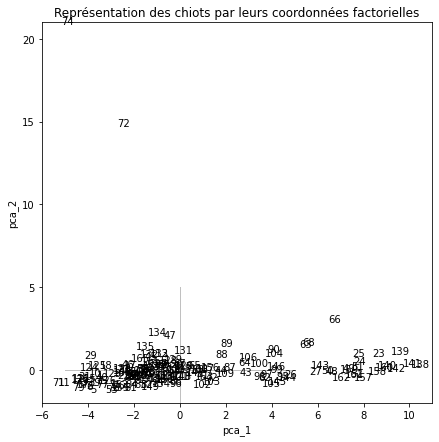

In [22]:
print(coord[:,0].max())
print(coord[:,1].max())

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(7,7))
axes.set_xlim(-6,11) #même limites en abscisse
axes.set_ylim(-2,21) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-5,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([-0,0],[-5,5],color='silver',linestyle='-',linewidth=1)
plt.xlabel("pca_1")
plt.ylabel("pca_2")
#affichage
plt.title("Représentation des chiots par leurs coordonnées factorielles")
plt.show()

C:\Users\Julia Vilas\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


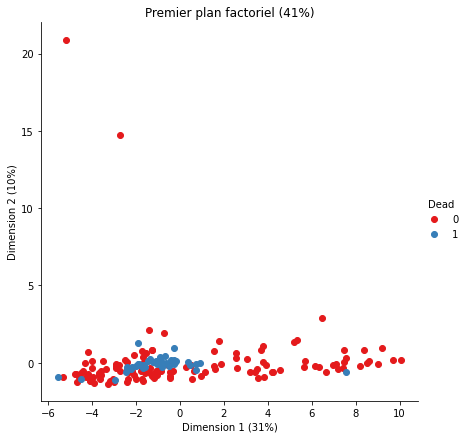

In [23]:
x = df.iloc[:,1:10].values
y = df.iloc[:,0].values

x_df = pd.DataFrame(x,columns=df.columns[1:10])
y_df = pd.DataFrame(y, columns=['Dead'])

pca = PCA(n_components=10).fit_transform(Z) # pca output is an array
pca_df = pd.DataFrame(pca,columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10']) # transforming back to df
pca_Y = pd.concat([pca_df, y_df],axis=1)

# Les deux classes de diabetiques se clusterisent bien ( peu de points rouges incustrés dans les bleus ) 
# Ceci indique que la classification peut se faire avec un niveau élévé d'accuracy

import matplotlib.pyplot as plt
import seaborn as sns
sns.FacetGrid(pca_Y, hue="Dead", palette="Set1", size=6).map(plt.scatter, "pca_1", "pca_2").add_legend()
plt.xlabel("Dimension 1 (31%)")
plt.ylabel("Dimension 2 (10%)")
plt.title("Premier plan factoriel (41%)")
plt.show()

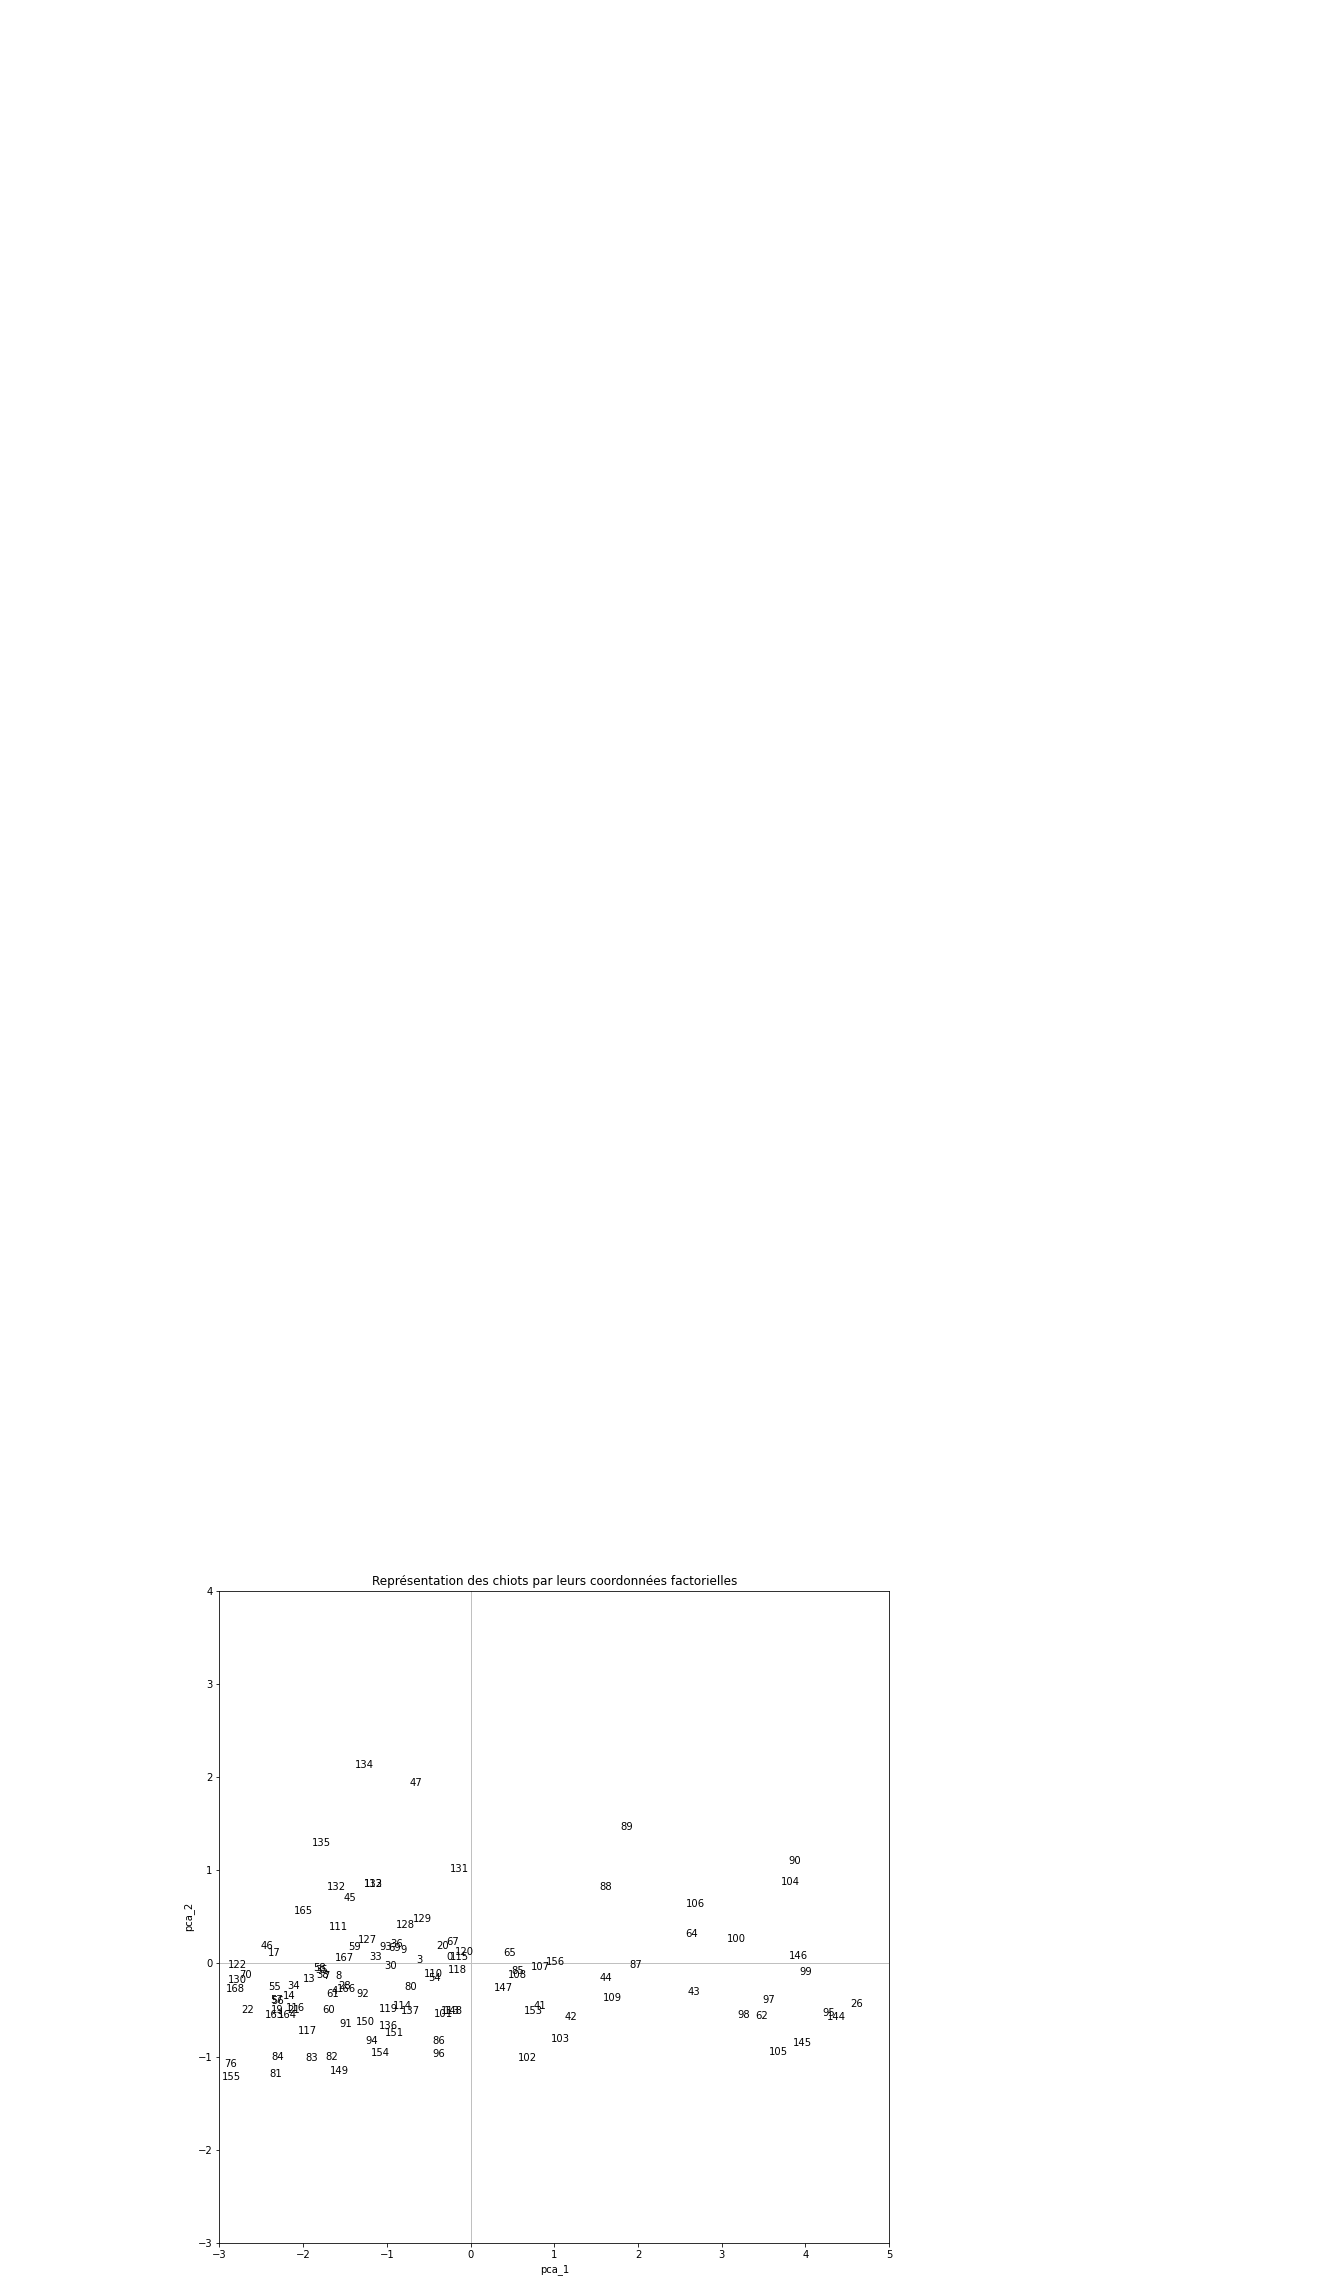

In [24]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-3,5) #même limites en abscisse
axes.set_ylim(-3,4) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(pca[i,0],pca[i,1]))
#ajouter les axes
plt.plot([-3,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.xlabel("pca_1")
plt.ylabel("pca_2")
plt.plot([0,0],[-3,4],color='silver',linestyle='-',linewidth=1)
#affichage
plt.title("Représentation des chiots par leurs coordonnées factorielles")
plt.show()

### Cosinus carré des variables (COS²)

In [28]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

      ID        d_i
0      0  11.442787
1      1  28.521020
2      2  29.537596
3      3   6.634192
4      4  10.398154
..   ...        ...
164  164  19.134609
165  165  33.747149
166  166  32.001356
167  167  40.620209
168  168  29.308277

[169 rows x 2 columns]


In [29]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

      id    COS2_1    COS2_2
0      0  0.007160  0.000112
1      1  0.450998  0.008795
2      2  0.565083  0.042551
3      3  0.063086  0.000004
4      4  0.263452  0.010425
..   ...       ...       ...
164  164  0.277140  0.018250
165  165  0.131522  0.008373
166  166  0.079519  0.003001
167  167  0.065006  0.000012
168  168  0.290694  0.003177

[169 rows x 3 columns]


### Contribution des individus aux axes (CTR)

In [30]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
 
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1         CTR_2
0      0  0.000035  1.739750e-06
1      1  0.005476  3.401095e-04
2      2  0.007106  1.704109e-03
3      3  0.000178  4.009354e-08
4      4  0.001166  1.469796e-04
..   ...       ...           ...
164  164  0.002258  4.734664e-04
165  165  0.001890  3.831038e-04
166  166  0.001083  1.302261e-04
167  167  0.001124  6.559565e-07
168  168  0.003627  1.262598e-04

[169 rows x 3 columns]


In [31]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)
# Les variables sont  en ligne, les facteurs en colonne :

[[-9.24423675e-03  1.37316959e-01 -7.29202696e-03 ...  1.97490647e-04
   5.70395432e-05  1.25504334e-05]
 [-2.59507947e-01  2.94910621e-02 -5.54165552e-02 ...  7.38373545e-04
   8.30511138e-06 -3.43619432e-06]
 [-8.17747257e-01  7.45365313e-03 -1.03738223e-01 ...  4.36270322e-05
  -4.58233197e-05 -4.81010491e-06]
 ...
 [ 1.11530679e-01 -7.91596749e-01 -3.12831447e-01 ... -1.63359642e-03
   1.36191706e-02 -7.27268105e-03]
 [ 1.34462203e-01 -9.23330271e-01 -2.22352391e-01 ...  3.70494982e-03
  -1.98308827e-02 -2.26861091e-03]
 [-8.87118883e-02  5.30449448e-01 -1.88690341e-01 ... -6.05592389e-04
   3.10786298e-04  1.19047341e-04]]


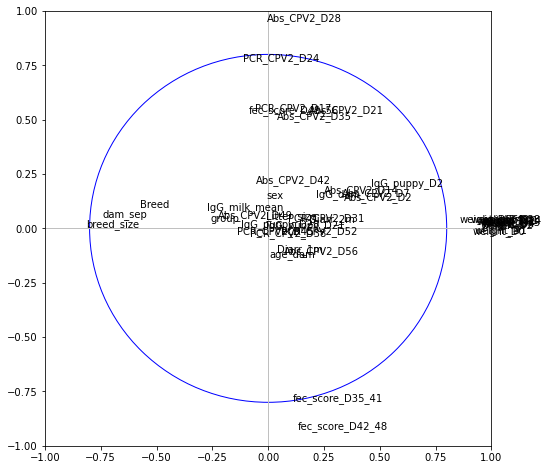

In [32]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),0.8,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [33]:
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                  id    COS2_1    COS2_2
0                sex  0.000085  0.018856
1              group  0.067344  0.000870
2         breed_size  0.668711  0.000056
3              Breed  0.330730  0.009382
4        Litter_size  0.000091  0.001894
5           Diarr_1m  0.001420  0.011251
6           Diarr_2m  0.033385  0.001004
7            dam_sep  0.548439  0.002583
8          weight_D0  0.840139  0.000577
9          weight_D1  0.851397  0.000346
10         weight_D2  0.909468  0.000017
11         weight_D3  0.916715  0.000083
12         weight_D4  0.924812  0.000111
13         weight_D7  0.907050  0.000373
14        weight_D14  0.918674  0.000589
15        weight_D21  0.900433  0.000748
16        weight_D28  0.913057  0.000878
17        weight_D35  0.917925  0.000217
18        weight_D42  0.872333  0.000358
19        weight_D49  0.821906  0.001038
20        weight_D56  0.732803  0.000810
21           IgG_dam  0.046011  0.020479
22           age_dam  0.000018  0.017724
23     IgG_milk_

In [34]:
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                  id     CTR_1         CTR_2
0                sex  0.000006  4.320658e-03
1              group  0.004845  1.992886e-04
2         breed_size  0.048112  1.273034e-05
3              Breed  0.023795  2.149847e-03
4        Litter_size  0.000007  4.339766e-04
5           Diarr_1m  0.000102  2.578002e-03
6           Diarr_2m  0.002402  2.301401e-04
7            dam_sep  0.039458  5.919333e-04
8          weight_D0  0.060445  1.321171e-04
9          weight_D1  0.061255  7.918085e-05
10         weight_D2  0.065433  3.835318e-06
11         weight_D3  0.065955  1.906247e-05
12         weight_D4  0.066537  2.547847e-05
13         weight_D7  0.065259  8.552054e-05
14        weight_D14  0.066096  1.348608e-04
15        weight_D21  0.064783  1.713645e-04
16        weight_D28  0.065692  2.011765e-04
17        weight_D35  0.066042  4.976498e-05
18        weight_D42  0.062762  8.214354e-05
19        weight_D49  0.059134  2.378921e-04
20        weight_D56  0.052723  1.855470e-04
21        